In [1]:
import numpy as np
import pandas as pd
import random

https://www.kaggle.com/c/avazu-ctr-prediction/data

In [2]:
#sample_size = 500000
#n = 40428967
#skip_values = sorted(random.sample(range(1,n), n-sample_size))

#sample_df=pd.read_csv('train.csv',skiprows = skip_values)

#sample_df.to_csv('C:/Users/surendhar/Desktop/DSE/E_COMMERECE/avazu-ctr-prediction/export_dataframe.csv', index = None, header=True)

sample_df=pd.read_csv('export_dataframe.csv')
sample_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10001868339616595934,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17747,320,50,1974,2,39,100019,33
1,10001966791793526909,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
2,10007446479189647526,0,14102100,1005,0,6ec06dbd,d262cf1e,f66779e6,ecad2386,7801e8d9,...,1,0,19870,320,50,2271,0,687,100075,48
3,10060080737601186118,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,100084,79
4,10061821744591918171,1,14102100,1005,0,f9c69707,e16ceb4b,28905ebd,ecad2386,7801e8d9,...,1,0,19666,300,250,2253,2,303,-1,52


In [3]:
sample_df.shape

(500000, 24)

In [4]:
sample_df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [5]:
sample_df['hour']=pd.to_datetime(sample_df['hour'],format='%y%m%d%H')

In [6]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
id                  500000 non-null uint64
click               500000 non-null int64
hour                500000 non-null datetime64[ns]
C1                  500000 non-null int64
banner_pos          500000 non-null int64
site_id             500000 non-null object
site_domain         500000 non-null object
site_category       500000 non-null object
app_id              500000 non-null object
app_domain          500000 non-null object
app_category        500000 non-null object
device_id           500000 non-null object
device_ip           500000 non-null object
device_model        500000 non-null object
device_type         500000 non-null int64
device_conn_type    500000 non-null int64
C14                 500000 non-null int64
C15                 500000 non-null int64
C16                 500000 non-null int64
C17                 500000 non-null int64
C18                 500000 non

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

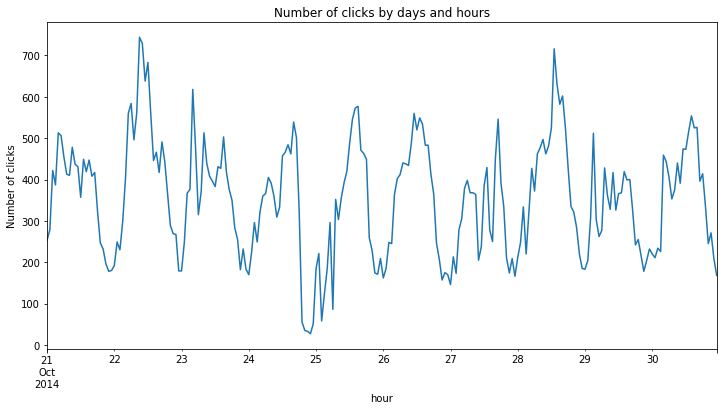

In [8]:
sample_df.groupby('hour').click.sum().plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by days and hours');

In [9]:
sample_df['hour_of_day']=sample_df.hour.apply(lambda x:x.hour) # creating hour of day column

Text(0.5, 1.0, 'Number of clicks by hours')

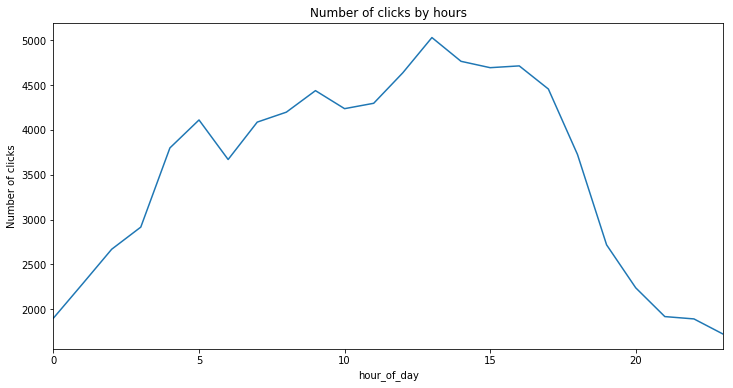

In [10]:
sample_df.groupby('hour_of_day').click.sum().plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hours')

In [11]:
sample_df['weekday']=sample_df.hour.apply(lambda x:x.dayofweek) # creating hour of day column

Text(0.5, 1.0, 'Number of clicks by weekdays')

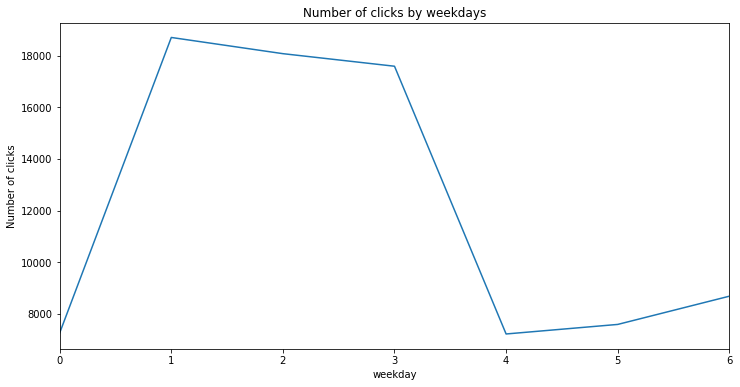

In [12]:
sample_df.groupby('weekday').click.sum().plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by weekdays')

Text(0.5, 1.0, 'Hourly click Analysis')

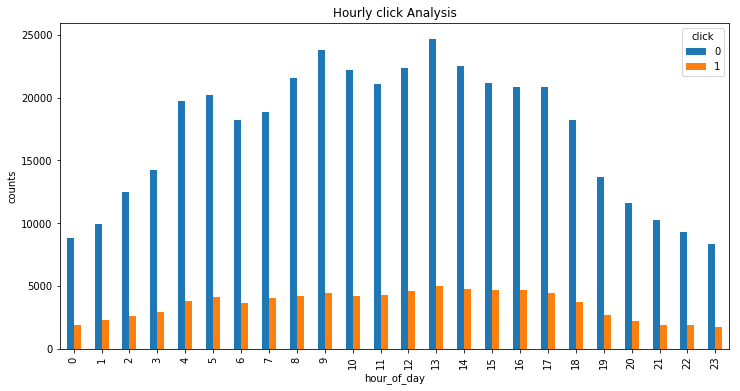

In [13]:
sample_df.groupby(['hour_of_day','click']).size().unstack().plot(kind='bar',figsize=(12,6))
plt.ylabel('counts')
plt.title('Hourly click Analysis')

Text(0.5, 1.0, 'Hourly click Analysis')

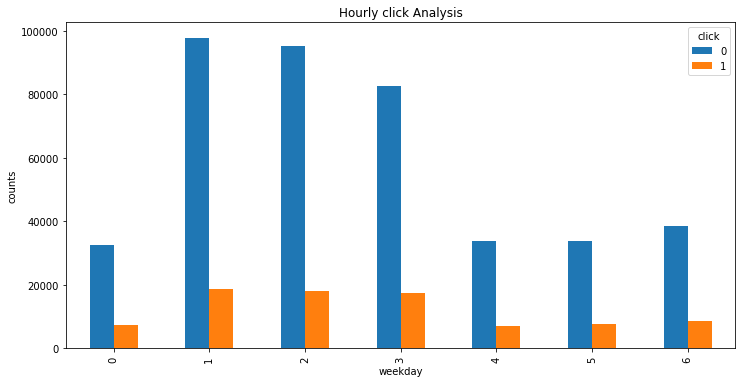

In [14]:
sample_df.groupby(['weekday','click']).size().unstack().plot(kind='bar',figsize=(12,6))
plt.ylabel('counts')
plt.title('Hourly click Analysis')

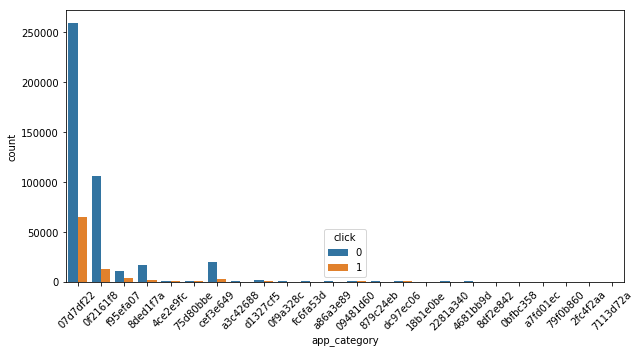

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='app_category',hue='click',data=sample_df)
plt.xticks(rotation=45)
plt.show()

# CTR

In [16]:
#sample_df.click.mean() # overall Click through Rate
sample_df.click.value_counts()/len(sample_df.index)

0    0.829764
1    0.170236
Name: click, dtype: float64

In [17]:
pd.DataFrame({'CTR_device_type':sample_df.groupby('device_type').mean().click},index=sample_df.device_type.unique())

,CTR_device_type
1,0.169489
0,0.211449
4,0.098930
5,0.098504


In [18]:
pd.DataFrame({'CTR_Banner_pos':sample_df.groupby('banner_pos').mean().click},index=sample_df.banner_pos.unique())

,CTR_Banner_pos
1,0.184587
0,0.164486
2,0.126667
5,0.072727
7,0.346614
4,0.188235
3,0.153846


In [19]:
pd.DataFrame({'CTR_C1':sample_df.groupby('C1').mean().click},index=sample_df.C1.unique())

,CTR_C1
1005,0.169695
1002,0.211449
1010,0.098868
1001,0.028846
1007,0.045249
1008,0.072727
1012,0.155072


In [20]:
pd.DataFrame({'CTR_C16':sample_df.groupby('C16').mean().click,
              'Count_C16':sample_df.groupby('C16').count().click,
             'Click_C16':sample_df.groupby('C16').sum().click},index=sample_df.C16.unique())

,CTR_C16,Count_C16,Click_C16
50,0.158719,471640,74858
250,0.422186,22329,9427
36,0.125959,3779,476
90,0.052397,897,47
480,0.233307,1243,290
1024,0.357143,14,5
768,0.296296,27,8
320,0.280000,25,7
20,0.000000,46,0


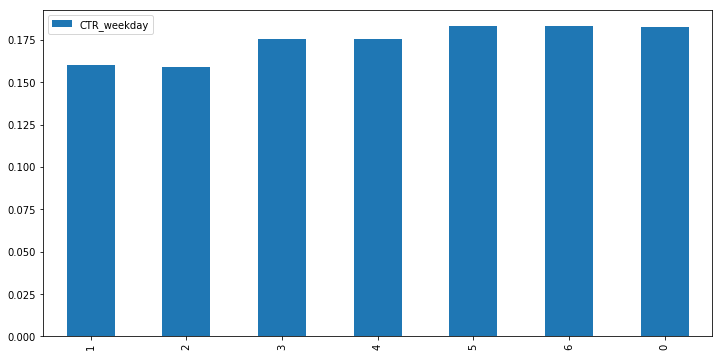

In [21]:
pd.DataFrame({'CTR_weekday':sample_df.groupby('weekday').mean().click},index=sample_df.weekday.unique()).plot(kind='bar',figsize=(12,6))

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in sample_df.select_dtypes(include='object').columns:
    sample_df[col]=le.fit_transform(sample_df[col])

In [23]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
id                  500000 non-null uint64
click               500000 non-null int64
hour                500000 non-null datetime64[ns]
C1                  500000 non-null int64
banner_pos          500000 non-null int64
site_id             500000 non-null int32
site_domain         500000 non-null int32
site_category       500000 non-null int32
app_id              500000 non-null int32
app_domain          500000 non-null int32
app_category        500000 non-null int32
device_id           500000 non-null int32
device_ip           500000 non-null int32
device_model        500000 non-null int32
device_type         500000 non-null int64
device_conn_type    500000 non-null int64
C14                 500000 non-null int64
C15                 500000 non-null int64
C16                 500000 non-null int64
C17                 500000 non-null int64
C18                 500000 non-null int

In [24]:
X=sample_df.drop(['id','hour','click'],axis=1)
y=sample_df.click

In [25]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logr = LogisticRegression()
logr.fit(xtrain,ytrain)

C:\Users\surendhar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
print(logr.score(xtrain, ytrain)) #trainscore

0.8288


In [28]:
lr_score=logr.score(xtest, ytest)
print(lr_score) #testscore

0.8289266666666667


In [29]:
ypred=logr.predict(xtest)
lr_prec=metrics.precision_score(ytest,ypred)
print(lr_prec)
metrics.confusion_matrix(ytest,ypred)

0.25384615384615383


array([[124273,    194],
       [ 25467,     66]], dtype=int64)

In [30]:
model_metrics=[]
model_metrics.append(['Logistic Regression',lr_score,lr_prec])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypredk=knn.predict(xtest)
knn_score=metrics.accuracy_score(ytest, ypredk)
knn_prec=metrics.precision_score(ytest,ypredk)
print(knn_score) #testscore

0.8034333333333333


In [32]:
model_metrics.append(['Knn',knn_score,knn_prec])

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=5)
dtc.fit(xtrain,ytrain)
ypreddt=dtc.predict(xtest)
dtc_score=metrics.accuracy_score(ytest, ypreddt)
dtc_prec=metrics.precision_score(ytest,ypreddt)
print(dtc_score) #testscore
model_metrics.append(['DT',dtc_score,dtc_prec])

0.83168


In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
ypredg=gnb.predict(xtest)
gnb_score=metrics.accuracy_score(ytest, ypredg)
gnb_prec=metrics.precision_score(ytest,ypredg)
print(gnb_score) #testscore
model_metrics.append(['GaussianNB',gnb_score,gnb_prec])

0.7914466666666666


In [35]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(xtrain, ytrain)
ypredb=bnb.predict(xtest)
bnb_score=metrics.accuracy_score(ytest, ypredb)
bnb_prec=metrics.precision_score(ytest,ypredb)
print(bnb_score) #testscore
model_metrics.append(['BernoulliNB',bnb_score,bnb_prec])

0.82978


C:\Users\surendhar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#from sklearn.svm import SVC
#svc=SVC()
#svc.fit(xtrain,ytrain)
#ypreds=svc.predict(xtest)
#svc_score=metrics.accuracy_score(ytest, ypreds)
#svc_prec=metrics.precision_score(ytest,ypreds)
#print(svc_score) #testscore
#modelscore.append(['SVC',svc_score,svc_prec])

In [39]:
models=[]
model_score=[]
precision_score=[]
for each in model_metrics:
    models.append(each[0])
    model_score.append(each[1])
    precision_score.append(each[2])
    
pd.DataFrame({'Accuracy Score':model_score,'Precision Score':precision_score},
             index=models).sort_values('Accuracy Score',ascending=False)



,Accuracy Score,Precision Score
DT,0.831680,0.544797
BernoulliNB,0.829780,0.000000
Logistic Regression,0.828927,0.253846
Knn,0.803433,0.272926
GaussianNB,0.791447,0.308257


In [40]:
metrics.confusion_matrix(ytest,ypredb)

array([[124467,      0],
       [ 25533,      0]], dtype=int64)

In [41]:
metrics.confusion_matrix(ytest,ypreddt)

array([[123019,   1448],
       [ 23800,   1733]], dtype=int64)